In [65]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else: 
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and suhsi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://layer-training-data-bucket.s3.ap-south-1.amazonaws.com/pizza_steak_sushi_data.zip")
  print("Downloading pizza, steak, suhsi data...")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)
     

data/pizza_steak_sushi directory already exists... skipping download
Unzipping pizza, steak and sushi data...


In [3]:

import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [4]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/sushi/2720223.jpg
Image class: sushi
Image height: 512
Image width: 512


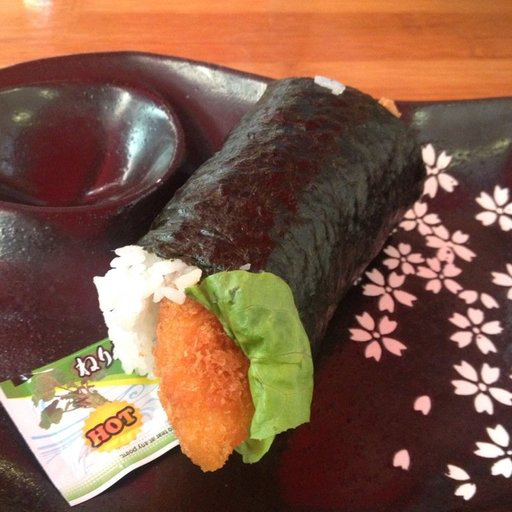

In [5]:
import random 
from PIL import Image

# Set seed
# random.seed(42)

# 1. Get all image paths 
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata 
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

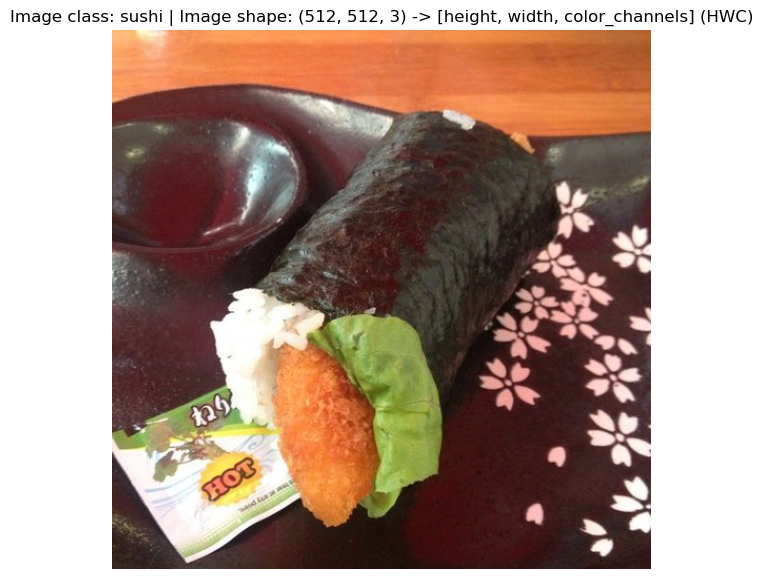

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False);

In [7]:

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [8]:
data_transform = transforms.Compose([
  transforms.Resize(size=(224, 224)),

  transforms.RandomHorizontalFlip(p=0.5),

  transforms.ToTensor() 
])

In [9]:

data_transform(img).shape

torch.Size([3, 224, 224])

In [60]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target 

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

test_data

train_data[0]

(tensor([[[0.1137, 0.1176, 0.1255,  ..., 0.1098, 0.1098, 0.1098],
          [0.1176, 0.1137, 0.1137,  ..., 0.1176, 0.1176, 0.1137],
          [0.1137, 0.1176, 0.1098,  ..., 0.1216, 0.1255, 0.1216],
          ...,
          [0.0941, 0.0902, 0.0863,  ..., 0.1765, 0.1725, 0.1765],
          [0.0902, 0.0902, 0.0902,  ..., 0.1608, 0.1686, 0.1686],
          [0.0863, 0.0863, 0.0824,  ..., 0.1490, 0.1529, 0.1529]],
 
         [[0.0706, 0.0745, 0.0824,  ..., 0.0549, 0.0549, 0.0549],
          [0.0745, 0.0706, 0.0706,  ..., 0.0627, 0.0627, 0.0588],
          [0.0706, 0.0745, 0.0667,  ..., 0.0627, 0.0667, 0.0627],
          ...,
          [0.1098, 0.1059, 0.1020,  ..., 0.2353, 0.2314, 0.2314],
          [0.1059, 0.1059, 0.1059,  ..., 0.2275, 0.2314, 0.2314],
          [0.1020, 0.1020, 0.0980,  ..., 0.2196, 0.2235, 0.2235]],
 
         [[0.0941, 0.0980, 0.1059,  ..., 0.0196, 0.0196, 0.0196],
          [0.0980, 0.0941, 0.0941,  ..., 0.0235, 0.0235, 0.0196],
          [0.0941, 0.0980, 0.0902,  ...,

In [11]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [12]:
len(train_data), len(test_data)

(225, 75)

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1677affd0>,
 <torch.utils.data.dataloader.DataLoader at 0x106753eb0>)

In [14]:
import torch
from torch import nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image

mobilenet_v2 = models.mobilenet_v2(pretrained=True)


# Modify classifier head for your specific task
num_classes = 3  # Number of classes in CIFAR-10
mobilenet_v2.classifier[1] = nn.Linear(mobilenet_v2.last_channel, num_classes)

/Users/rehanchoudhury/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/rehanchoudhury/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
sample_inference_image, label = train_data[0]

with torch.no_grad():
    output = mobilenet_v2(sample_inference_image.unsqueeze(dim=0))

# Get predicted class
predicted_class = torch.argmax(output, dim=1).item()

print(f"Predicted class index: {predicted_class}")
output

Predicted class index: 0


tensor([[0.8431, 0.1700, 0.2268]])

In [45]:
# Loss and optimizer
loss_fn = nn.CrossEntropyLoss() # is combines BCE with sigmoid

optimizer = torch.optim.SGD(params = mobilenet_v2.parameters(), lr=0.01)

In [46]:
def normalizePredictions(y_pred):
    vals = torch.softmax(y_pred, dim=1)
    return torch.argmax(vals, dim=1)

In [47]:
from helpers import calculate_accuracy

torch.manual_seed(42)

epochs = 10

train_epochs = []
train_loss_arr = []
test_loss_arr = []

for epoch in range(epochs):
    
    train_loss = 0;
    train_acc = 0;
    
    print(f"Epoch: {epoch}\n----------")
    
    train_epochs.append(epoch)
    
    for batch, (X, Y) in enumerate(train_dataloader):
    
        
        mobilenet_v2.train();
        
        y_logits_train = mobilenet_v2(X)
        
        loss = loss_fn(y_logits_train, Y)
        
        y_pred_train = normalizePredictions(y_logits_train)
        
        train_loss+=loss
        
        train_acc+=calculate_accuracy(Y ,y_pred_train)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        mobilenet_v2.eval()
        
        if batch % 10 == 0:
            print(f"batch : {batch}")
            
    # Average train_loss        
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    
    train_loss_arr.append(train_loss.item())
    
    print(f"Train loss for {epoch}: {train_loss} | Train acc: {train_acc}")
    
    ### Testing
    
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for X_test, Y_test in test_dataloader:
            
            y_logits_test = mobilenet_v2(X_test)
        
            test_loss = loss_fn(y_logits_test, Y_test)
            
            test_loss+=test_loss
            
            y_pred_test = normalizePredictions(y_logits_test)
            
            test_acc+=calculate_accuracy(Y_test ,y_pred_test)
            
        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
        
        test_loss_arr.append(test_loss.item())
        
        print(f"Test loss for {epoch}: {test_loss}, Test acc: {test_acc}")
    
    

Epoch: 0
----------
batch : 0
Train loss for 0: 1.0465662479400635 | Train acc: 44.921875
Test loss for 0: 2.080899477005005, Test acc: 26.041666666666668
Epoch: 1
----------
batch : 0
Train loss for 1: 0.7676026225090027 | Train acc: 69.140625
Test loss for 1: 1.3707479238510132, Test acc: 26.041666666666668
Epoch: 2
----------
batch : 0
Train loss for 2: 0.5945924520492554 | Train acc: 73.046875
Test loss for 2: 0.018662234768271446, Test acc: 70.83333333333333
Epoch: 3
----------
batch : 0
Train loss for 3: 0.4604351818561554 | Train acc: 75.0
Test loss for 3: 1.023837685585022, Test acc: 46.68560606060606
Epoch: 4
----------
batch : 0
Train loss for 4: 0.37314265966415405 | Train acc: 79.6875
Test loss for 4: 0.7185121178627014, Test acc: 52.746212121212125
Epoch: 5
----------
batch : 0
Train loss for 5: 0.23225553333759308 | Train acc: 93.359375
Test loss for 5: 0.3265646994113922, Test acc: 83.52272727272727
Epoch: 6
----------
batch : 0
Train loss for 6: 0.37821948528289795 | Tr

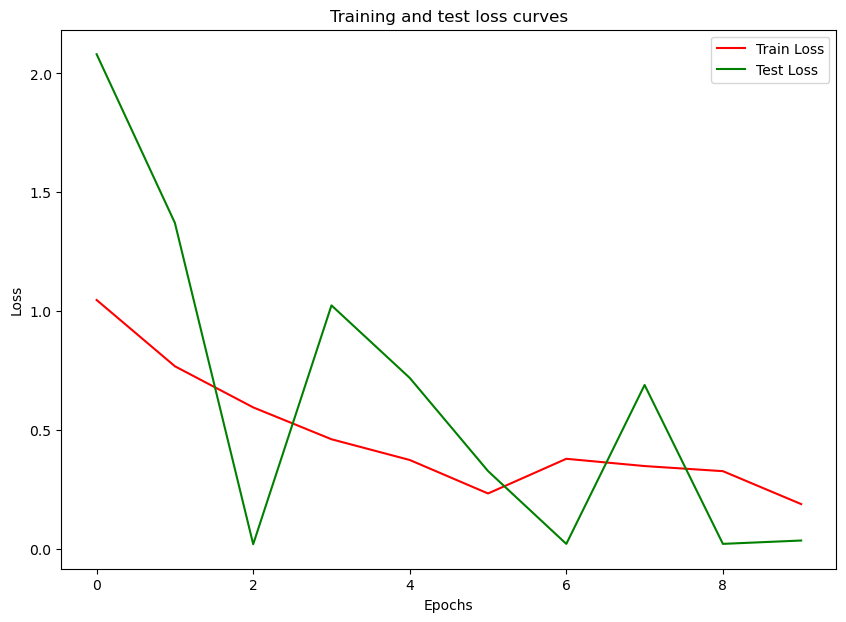

In [48]:
from helpers import plot_train_graph, plot_decision_boundary

plot_train_graph(x=train_epochs, y_train=train_loss_arr, y_test=test_loss_arr)

In [54]:
def make_prediction( model, data):
    pred_probs = [];
    model.eval()
    
    with torch.inference_mode():
        for sample in data:
            
            sample = torch.unsqueeze(sample, dim=0)
            
            pred_logits = model(sample)
            
            y_pred_train = normalizePredictions(pred_logits)
            
            pred_probs.append(y_pred_train)
            
    return torch.stack(pred_probs)

In [55]:
import random
torch.manual_seed(0)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample);
    test_labels.append(label);
    
test_labels
sample[0].shape
test_labels

[2, 0, 0, 2, 1, 0, 0, 2, 1]

In [56]:
pred_labels = make_prediction(mobilenet_v2, test_samples)

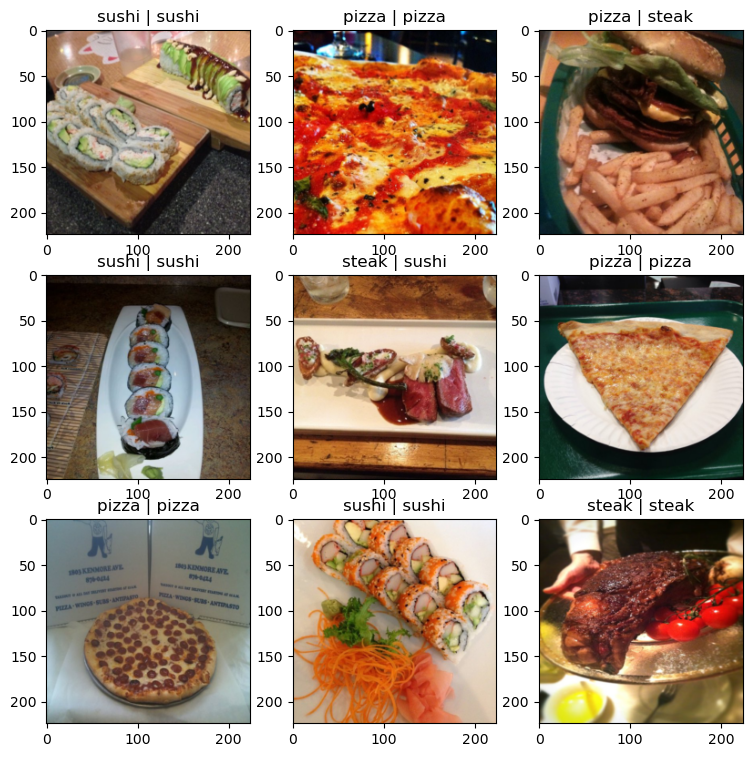

In [57]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    image_array = np.transpose(sample.numpy(), (1, 2, 0))
    plt.imshow(image_array, cmap="gray")
    plt.title(class_names[test_labels[i]]+" | " + class_names[pred_labels[i]])

In [99]:
import torch
from torch import nn
import numpy as np


flatten_model = nn.Flatten()

torch.manual_seed(40)
# Tiny VVG model
class VVGModelV2(nn.Module):
    
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      stride=1,
                      padding=1 # same padding value
                     ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      stride=1,
                      padding=1 # same padding value
                     ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 27
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      stride=1,
                      padding=1 # same padding value
                     ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      stride=1,
                      padding=1 # same padding value
                     ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # 26
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*56*56, out_features=output_shape),
        )
        
    def forward(self, x):
        x  = self.conv_block_1(x)
        # print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x) 
        # print(f"Output shape of conv_block_3: {x.shape}")
        return x

In [107]:
model_VGG = VVGModelV2(
          input_shape=3,
          hidden_units=20,
          output_shape=3,
          )

In [108]:
sample_inference_image, label = train_data[0]

with torch.no_grad():
    output = model_VGG(sample_inference_image.unsqueeze(dim=0))

# Get predicted class
predicted_class = torch.argmax(output, dim=1).item()

print(f"Predicted class index: {predicted_class}")
output

Predicted class index: 0


tensor([[ 0.0452,  0.0324, -0.0174]])

In [111]:
# Loss and optimizer
loss_fn_2 = nn.CrossEntropyLoss() # is combines BCE with sigmoid

optimizer_2 = torch.optim.SGD(params = mobilenet_v2.parameters(), lr=0.01)

In [112]:
from helpers import calculate_accuracy

torch.manual_seed(42)

epochs = 10

train_epochs = []
train_loss_arr = []
test_loss_arr = []

for epoch in range(epochs):
    
    train_loss = 0;
    train_acc = 0;
    
    print(f"Epoch: {epoch}\n----------")
    
    train_epochs.append(epoch)
    
    for batch, (X, Y) in enumerate(train_dataloader):
    
        
        model_VGG.train();
        
        y_logits_train = model_VGG(X)
        
        loss = loss_fn_2(y_logits_train, Y)
        
        y_pred_train = normalizePredictions(y_logits_train)
        
        train_loss+=loss
        
        train_acc+=calculate_accuracy(Y ,y_pred_train)
        
        optimizer_2.zero_grad()
        
        loss.backward()
        
        optimizer_2.step()
        
        model_VGG.eval()
        
        if batch % 10 == 0:
            print(f"batch : {batch}")
            
    # Average train_loss        
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    
    train_loss_arr.append(train_loss.item())
    
    print(f"Train loss for {epoch}: {train_loss} | Train acc: {train_acc}")
    
    ### Testing
    
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for X_test, Y_test in test_dataloader:
            
            y_logits_test = model_VGG(X_test)
        
            test_loss = loss_fn_2(y_logits_test, Y_test)
            
            test_loss+=test_loss
            
            y_pred_test = normalizePredictions(y_logits_test)
            
            test_acc+=calculate_accuracy(Y_test ,y_pred_test)
            
        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
        
        test_loss_arr.append(test_loss.item())
        
        print(f"Test loss for {epoch}: {test_loss}, Test acc: {test_acc}")
    

Epoch: 0
----------
batch : 0
Train loss for 0: 1.0952171087265015 | Train acc: 42.578125
Test loss for 0: 0.7560040354728699, Test acc: 26.041666666666668
Epoch: 1
----------
batch : 0
Train loss for 1: 1.0955535173416138 | Train acc: 42.578125
Test loss for 1: 0.7562239766120911, Test acc: 26.041666666666668
Epoch: 2
----------
batch : 0
Train loss for 2: 1.0955371856689453 | Train acc: 42.578125
Test loss for 2: 0.7563287615776062, Test acc: 26.041666666666668
Epoch: 3
----------
batch : 0
Train loss for 3: 1.0967603921890259 | Train acc: 30.46875
Test loss for 3: 0.756340742111206, Test acc: 26.041666666666668
Epoch: 4
----------
batch : 0
Train loss for 4: 1.0951945781707764 | Train acc: 42.578125
Test loss for 4: 0.7560520172119141, Test acc: 26.041666666666668
Epoch: 5
----------
batch : 0
Train loss for 5: 1.0969829559326172 | Train acc: 30.46875
Test loss for 5: 0.7564964890480042, Test acc: 26.041666666666668
Epoch: 6
----------
batch : 0
Train loss for 6: 1.0970182418823242 

In [34]:
# Using resnet18 model
import torchvision.models as models

resnet18_model = models.resnet34(pretrained=True)

num_classes = 3

num_features = resnet18_model.fc.in_features

resnet18_model.fc = nn.Linear(num_features, num_classes) 

In [35]:
sample_inference_image, label = train_data[0]

with torch.no_grad():
    output = resnet18_model(sample_inference_image.unsqueeze(dim=0))

# Get predicted class
predicted_class = torch.argmax(output, dim=1).item()

print(f"Predicted class index: {predicted_class}")
output

Predicted class index: 2


tensor([[-0.9627, -0.8463,  0.0935]])

In [43]:
# Loss and optimizer
loss_fn_3 = nn.CrossEntropyLoss() # is combines BCE with sigmoid

optimizer_3 = torch.optim.SGD(params = resnet18_model.parameters(), lr=0.01)

In [44]:
from helpers import calculate_accuracy

torch.manual_seed(42)

epochs = 10

train_epochs = []
train_loss_arr = []
test_loss_arr = []

for epoch in range(epochs):
    
    train_loss = 0;
    train_acc = 0;
    
    print(f"Epoch: {epoch}\n----------")
    
    train_epochs.append(epoch)
    
    for batch, (X, Y) in enumerate(train_dataloader):
    
        
        resnet18_model.train();
        
        y_logits_train = resnet18_model(X)
        
        loss = loss_fn_3(y_logits_train, Y)
        
        y_pred_train = normalizePredictions(y_logits_train)
        
        train_loss+=loss
        
        train_acc+=calculate_accuracy(Y ,y_pred_train)
        
        optimizer_3.zero_grad()
        
        loss.backward()
        
        optimizer_3.step()
        
        resnet18_model.eval()
        
        if batch % 10 == 0:
            print(f"batch : {batch}")
            
    # Average train_loss        
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
    
    train_loss_arr.append(train_loss.item())
    
    print(f"Train loss for {epoch}: {train_loss} | Train acc: {train_acc}")
    
    ### Testing
    
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for X_test, Y_test in test_dataloader:
            
            y_logits_test = resnet18_model(X_test)
        
            test_loss = loss_fn_3(y_logits_test, Y_test)
            
            test_loss+=test_loss
            
            y_pred_test = normalizePredictions(y_logits_test)
            
            test_acc+=calculate_accuracy(Y_test ,y_pred_test)
            
        test_loss/=len(test_dataloader)
        test_acc/=len(test_dataloader)
        
        test_loss_arr.append(test_loss.item())
        
        print(f"Test loss for {epoch}: {test_loss}, Test acc: {test_acc}")

Epoch: 0
----------
batch : 0
Train loss for 0: 0.9842194318771362 | Train acc: 49.609375
Test loss for 0: 0.852882444858551, Test acc: 26.041666666666668
Epoch: 1
----------
batch : 0
Train loss for 1: 1.0038702487945557 | Train acc: 50.0
Test loss for 1: 0.8347561955451965, Test acc: 22.916666666666668
Epoch: 2
----------
batch : 0
Train loss for 2: 0.9746646881103516 | Train acc: 48.046875
Test loss for 2: 0.929438054561615, Test acc: 25.0
Epoch: 3
----------
batch : 0
Train loss for 3: 1.1839141845703125 | Train acc: 37.109375
Test loss for 3: 0.9919801354408264, Test acc: 27.083333333333332
Epoch: 4
----------
batch : 0
Train loss for 4: 1.008644461631775 | Train acc: 48.046875
Test loss for 4: 0.8526173233985901, Test acc: 22.916666666666668
Epoch: 5
----------
batch : 0
Train loss for 5: 1.176080584526062 | Train acc: 37.890625
Test loss for 5: 0.9970796704292297, Test acc: 26.041666666666668
Epoch: 6
----------
batch : 0
Train loss for 6: 1.0523979663848877 | Train acc: 37.5
Te